## Import Statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#import scikitplot as skplt

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import metrics

Set plot style

In [2]:
plt.style.use('seaborn-white')

## Define Helper Functions

In [3]:
def plot_ROC(model, X_test, y_test, label=''):
    y_prob = model.predict_proba(X_test)
    ax = skplt.metrics.plot_roc(y_test, y_prob, plot_micro=False, plot_macro=False)
    ax.set_xlim([-0.01, 1.0])
    ax.set_ylim([0.0, 1.05])
    
    handles, labels = ax.get_legend_handles_labels()
    if len(labels) > 0:
        labels[0] = labels[0].replace('ROC curve of class 1', label)
    ax.legend(handles, labels, loc="lower right")
    ax.set_title('ROC Curves for {}'.format(label))
    plt.show()

## Load Dataset

In [4]:
## Please update the below path to the location that you have saved the data file
path = 'Ind_Assignment_DataSet.xlsx'
df = pd.read_excel(path)
df.head()

,Unnamed: 0,X1,X2,Outcome
0,0,-0.449505,0.398471,1
1,1,-0.060994,1.048735,1
2,2,-0.472932,0.223844,1
3,3,-0.730752,0.177602,1
4,4,-0.959757,0.515712,1


## Feature Engineering

In [5]:
# Set features and target
X = df[['X1', 'X2']] # you will need to add more features depending on your data set
y = df['Outcome']

# Split into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

## Logistic Regression Model - Confusion Matrix

              precision    recall  f1-score   support

           0       0.90      0.85      0.87        86
           1       0.89      0.93      0.91       114

    accuracy                           0.90       200
   macro avg       0.90      0.89      0.89       200
weighted avg       0.90      0.90      0.89       200

[[ 73  13]
 [  8 106]]


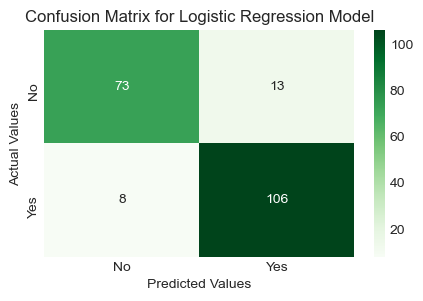

In [6]:
# fit the model
model_log = LogisticRegression()
model_log.fit(X_train, y_train)

# predict on test set
y_pred = model_log.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["No", "Yes"], yticklabels = ["No", "Yes"], cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for Logistic Regression Model")
plt.show()


## Linear Discriminant Analysis (LDA) - Confusion Matrix

              precision    recall  f1-score   support

           0       0.91      0.83      0.87        86
           1       0.88      0.94      0.91       114

    accuracy                           0.89       200
   macro avg       0.89      0.88      0.89       200
weighted avg       0.89      0.89      0.89       200

[[ 71  15]
 [  7 107]]


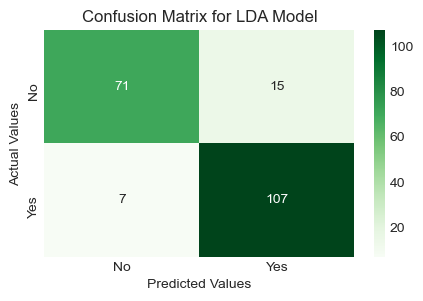

In [7]:
# fit the model
model_lda = LinearDiscriminantAnalysis(solver='svd')
model_lda.fit(X_train, y_train)

# predict on test set
y_pred = model_lda.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["No", "Yes"], yticklabels = ["No", "Yes"], cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for LDA Model")
plt.show()


## Quadratic Discriminant Analysis - Confusion Matrix

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        86
           1       0.93      0.97      0.95       114

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.95      0.94      0.94       200

[[ 78   8]
 [  3 111]]


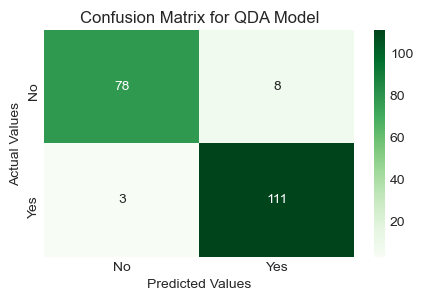

In [8]:
# fit the model
model_qda = QuadraticDiscriminantAnalysis()
model_qda.fit(X_train, y_train)

# predict on test set
y_pred = model_qda.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["No", "Yes"], yticklabels = ["No", "Yes"], cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for QDA Model")
plt.show()


## K-NEAREST NEIGHBOURS (KNN) - Confusion Matrix

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        86
           1       0.93      0.93      0.93       114

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

[[ 78   8]
 [  8 106]]


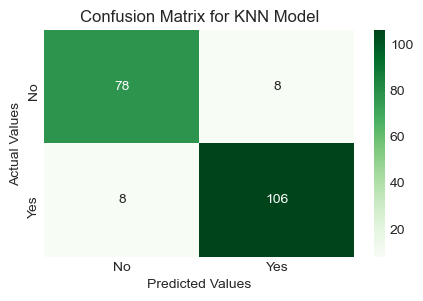

In [9]:
# fit the model
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

# predict on test set
y_pred = model_knn.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["No", "Yes"], yticklabels = ["No", "Yes"], cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for KNN Model")
plt.show()

## Random Forest (RF) - Confusion Matrix

              precision    recall  f1-score   support

           0       0.92      0.93      0.92        86
           1       0.95      0.94      0.94       114

    accuracy                           0.94       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.94      0.94      0.94       200

[[ 80   6]
 [  7 107]]


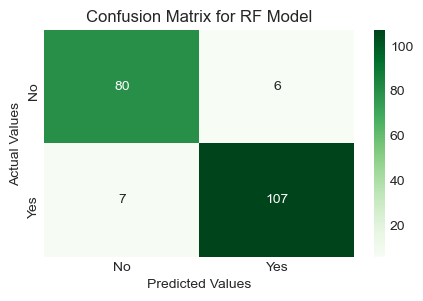

In [10]:
# fit the model
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

# predict on test set
y_pred = model_rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot Confusion Matrix
plt.figure(figsize=(5,3), dpi=100)
ax = sns.heatmap(cm, annot = True, fmt='d', xticklabels = ["No", "Yes"], yticklabels = ["No", "Yes"], cmap="Greens")
ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix for RF Model")
plt.show()

## Model Dictionary

In [11]:
# Create model dictionary to loop through models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier()))

## Box Plot for all Models

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
    
    
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score

LR: 0.866000 (0.021541)
LDA: 0.860000 (0.026833)
QDA: 0.900000 (0.032249)
KNN: 0.877000 (0.031639)
RF: 0.871000 (0.028792)


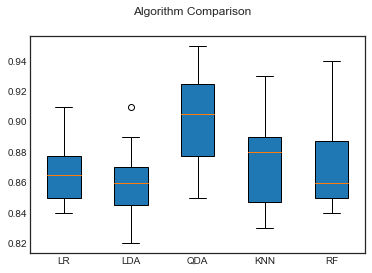

In [12]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, patch_artist=True)
ax.set_xticklabels(names)
plt.show()

## ROC Curve for all Models

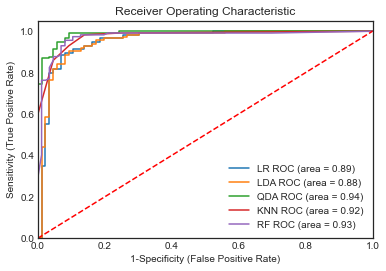

In [13]:
for name, model in models:
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    # Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
    # Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,y_pred)
    # Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   

In [14]:
def plot_prediction_grid(model):   
#     knn = KNeighborsClassifier(n_neighbors)
#     knn.fit(inputs, outcomes)
#     sk_predictions = knn.predict(inputs)

    h=0.02 #step for creating the grid mesh

    #Define the grid and make a prediction for each
    x1_min, x1_max = df.X1[:].min() - .5, df.X1[:].max() + .5
    x2_min, x2_max = df.X2[:].min() - .5, df.X2[:].max() + .5
    xx, yy = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    #Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot Mesh
    Z = Z.reshape(xx.shape)
    title = "Model:" + str(model)
    plt.title(title)
    plt.figure(1, figsize=(6, 6))
    plt.set_cmap(cmap='Set2')
    plt.pcolormesh(xx, yy, Z)

    # Plot inputs
    plt.scatter(df.X1[:], df.X2[:], s=15,c=df.Outcome,cmap='bwr' )

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()


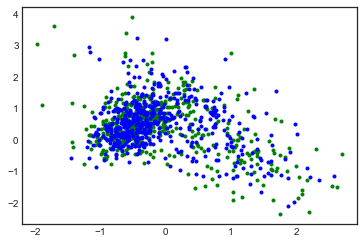

<ipython-input-14-062c4a737d3c>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)


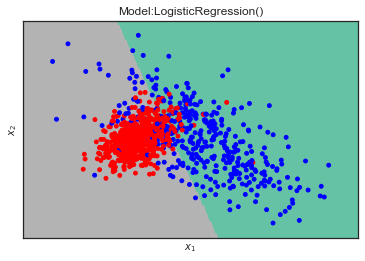

<ipython-input-14-062c4a737d3c>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)


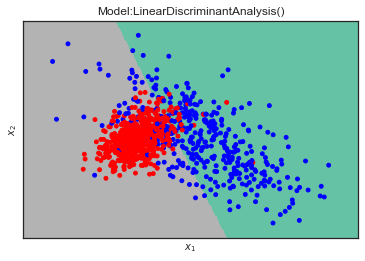

<ipython-input-14-062c4a737d3c>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)


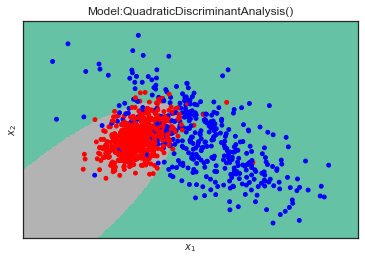

<ipython-input-14-062c4a737d3c>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)


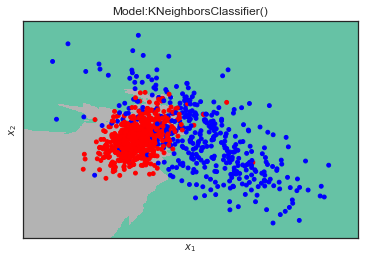

<ipython-input-14-062c4a737d3c>:21: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z)


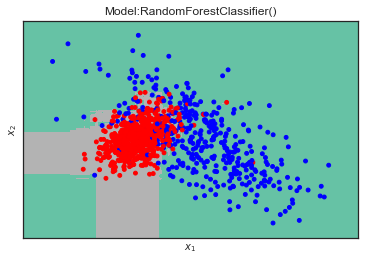

In [15]:
models = [model_log,model_lda,model_qda,model_knn,model_rf]

n= int(len(df)/2)
plt.figure()
plt.plot(df.X1[:n],df.X2[:n],"go",ms=3)
plt.plot(df.X1[n:],df.X2[n:],"bo",ms=3)
plt.show()

for model in models:
    plot_prediction_grid(model)